# **CNN Eample using MNIST Database**

Let us implement a **Convolutional Neural Network (CNN)** step-by-step using the famous **MNIST** (Modified National Institute of Standards and Technology) database, a large database of handwritten digits.

For the purpose of this implementation, we will use **TensorFlow/Keras**. We will cover the entire process from model building to training and evaluation, along with hyperparameter tuning and common pitfalls.

### **Step 1: Install the required libraries.**

If not already installed we need to install `tensorflow` by running the below command in the bash terminal:<br>
`pip install tensorflow`

### **Step 2: Import Necessary Libraries**

First we will import all the necessary libraries that we are going to use in our code.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### **Step 3: Load and Preprocess the Data**

We will use the **MNIST dataset** for digit recognition. TensorFlow provides a convenient function to load the dataset.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shape of training data
print(x_train.shape, y_train.shape)

# Reshape the data to include a single color channel (grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 28, 28) (60000,)


**Why Reshaping is needed?**

CNN models expect input data in the format `(batch_size, height, width, channels)`, where:

- `batch_size` is the number of images in each batch.
- `height` and `width` are the dimensions of each image.
- `channels` indicates the color channels (1 for grayscale, 3 for RGB, etc.).

So, by reshaping `x_train`, you're making the data compatible with the input layer of the CNN, which expects a 4D array of shape `(num_samples, 28, 28, 1)` for the MNIST dataset.

**Why Normalize the image data?**

The pixel values in the MNIST dataset range from 0 to 255. In image processing and machine learning, it's common practice to **normalize** the data to a smaller range to help the model converge faster and improve performance.

By dividing each pixel value by 255.0, the new pixel values will be scaled to be between 0 and 1 instead of the original range of 0 to 255. This transformation is crucial because neural networks typically perform better when the input data is in a standardized range (like between 0 and 1) - **faster convergence** and **improved accuracy**.

**What is One-Hot Encoding?**

One-hot encoding is a method of converting categorical data into a binary format that can be provided to machine learning algorithms. In this context, each label (e.g., the digits in the MNIST dataset, ranging from 0 to 9) is converted into a vector where:
- The position corresponding to the correct class is marked with a 1.
- All other positions are marked with 0.

For example, for a label `3`, the one-hot encoded vector would be: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`

### **Step 4: Build the CNN Model**

Now let’s define the CNN model using **TensorFlow/Keras**. We’ll start with a simple CNN architecture.

In [3]:
# Build the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer (10 classes for digit recognition)
model.add(layers.Dense(10, activation='softmax')) #num_classes=10

# Summary of the model architecture
model.summary()

C:\Users\Suvinava Basak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation of Different Layers**

- **Input Layer**:
  - This layer simply holds the input data, preparing it for subsequent layers.
  - Shape: `(28, 28, 1)` (grayscale MNIST image with height and width of 28 pixels and 1 channel).
- **Convolutional Layer 1**:
  - Extracts features like edges, corners, or patterns from the image.
  - Uses 32 filters (or kernels) of size `3 X 3` to scan over the input image.
  - Each filter performs a dot product with overlapping regions in the image (convolution).
  - **ReLU Activation**: Keeps only positive values, making the model nonlinear.
  - Output Shape: If the input is `28 x 28 x 1`, this layer outputs `26 x 26 x 32` (height and width shrink due to the `3 x 3` kernel).
- **Max Pooling Layer 1**:
  - Reduces the spatial dimensions (height and width) to make the model more efficient and reduce overfitting.
  - Divides the input into `2 x 2` regions and keeps only the maximum value from each region.
  - Output Shape: `26 x 26 x 32` becomes `13 x 13 x 32`.
- **Convolutional Layer 2**:
  - Extracts more complex patterns, such as shapes or textures.
  - Applies 64 filters (or kernels) of size `3 X 3`
  - **ReLU Activation** is applied again to retain only positive values.
  - Output Shape: `13 x 13 x 32` becomes `11 x 11 x 64`.
- **Max Pooling Layer 2**:
  - Further reduces the spatial dimensions to focus on the most prominent features.
  - Divides the input into `2 x 2` regions and keeps only the maximum value from each region, similar to Max Pooling Layer 1.
  - Output Shape: `11 x 11 x 64` becomes `5 x 5 x 64`.
- **Flatten Layer**:
  - Converts the 3D tensor output from the previous layers into a 1D vector to pass into a fully connected layer.
  - `5 x 5 x 64` is flattened into a single vector of size `1600` (= `5 x 5 x 64`)
- **Fully Connected (Dense) Layer**:
  - Learns high-level patterns by connecting all neurons from the flattened vector.
  - 64 neurons are connected to the `1600`-dimensional input vector.
  - **ReLU Activation** is applied to introduce nonlinearity.
  - Output Shape: 64 neurons.
- **Output Layer**:
  - Produces a probability distribution for the 10 classes (digits 0-9).
  - The **Softmax Activation Function** ensures that the outputs sum to 1 and can be interpreted as probabilities.
  - Output Shape: 10 neurons, each for one class.

**How the number of filters (kernels) is decided?**

The number of filters (e.g., `32` in the Convolutional Layer 1, `64` in the Convolutional Layer 2) is a hyperparameter decided during the design of the CNN. It is not automatically calculated but is chosen based on the following considerations:
- **Feature Complexity**: The first convolutional layer typically uses fewer filters (e.g., 32) because it captures low-level features such as edges, lines, or corners. Subsequent layers use more filters (e.g., 64, 128, etc.) because they capture higher-level, more abstract features like textures or shapes.
- **Empirical Rules**: A common practice is to start with a small number (e.g., 32 filters) and double the number in subsequent layers (e.g., 64, 128). This progression allows the model to capture increasingly complex features as the network deepens.

**How the Flatten Layer Connects to the Fully Connected Layer?**

- The Flatten layer converts the 3D tensor output of the final pooling layer into a 1D vector. For example: The tensor at the final pooling layer has a shape of `5 x 5 x 64` (height, width, number of filters). Flattening converts this into a vector of `5 x 5 x 64 = 1600` elements.
- Each of the `1600` values (neurons) in the flattened vector is connected to all neurons in the Dense layer (which has 64 neurons in this example). This results in `1600 x 64 = 102,400` weights in this layer, plus `64` biases (one for each neuron).

The number of neurons in the fully connected layer is another hyperparameter, chosen based on: complexity of the dataset, experimentation, regularization need etc.

**We can add multiple dense layers with a dropout layer in between! This is a common technique in deep learning to improve the performance of the network, especially to prevent overfitting.**

**What Does a Dropout Layer Do?**

The Dropout layer randomly sets a fraction of the input neurons (e.g., 20%-50%) to zero during training. These "dropped" neurons are ignored in both the forward pass and backpropagation. This effectively prevents the network from relying too heavily on any specific neurons.

During **training**, neurons are dropped randomly with a specified probability (e.g., `rate=0.5` means 50% of the neurons are ignored). This forces the network to learn redundant representations of features, as other neurons must compensate for the dropped ones.

During **inference(testing)**, no neurons are dropped, but their outputs are scaled down by the dropout rate to reflect the expected contribution during training.

**Purpose of Dropout Layer**:
- **Prevents overfitting**: Dropout ensures the model generalizes better by reducing reliance on specific neurons. Dense layers have a large number of parameters (e.g., `1600 x 64 = 102,400`), making them prone to overfitting, especially when the dataset is small or simple.
- **Promotes Robust Feature Learning**: By forcing the network to distribute the learning across multiple neurons, dropout helps the model learn more diverse and robust feature representations.
- **Regularization Technique**: Similar to weight regularization (like L2 regularization), dropout adds randomness to prevent over-reliance on specific paths in the network.

**Adding Multiple Dense Layers with Dropout**

```
from tensorflow.keras import layers, models

model = models.Sequential()

# Flatten layer
model.add(layers.Flatten(input_shape=(5, 5, 64)))  # Input from previous CNN layers

# Fully connected dense layers with dropout
model.add(layers.Dense(128, activation='relu'))  # First dense layer with 128 neurons
model.add(layers.Dropout(0.5))  # Dropout with 50% rate

model.add(layers.Dense(64, activation='relu'))  # Second dense layer with 64 neurons
model.add(layers.Dropout(0.5))  # Dropout with 50% rate

# Output layer
model.add(layers.Dense(10, activation='softmax'))  # Final output layer for classification
```

### **Step 5: Compile the Model**

Once the model is built, we need to compile it. The compile step specifies the optimizer, loss function, and metrics to evaluate during training.

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Step 6: Train the Model**

Next, let’s train the model using the training data.

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)
print("The model has successfully trained")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8826 - loss: 0.4056 - val_accuracy: 0.9816 - val_loss: 0.0548
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9812 - loss: 0.0598 - val_accuracy: 0.9852 - val_loss: 0.0448
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9870 - val_loss: 0.0377
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9931 - loss: 0.0211 - val_accuracy: 0.9899 - val_loss: 0.0321
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9947 - loss: 0.0161 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9893 - val_loss: 0.0338
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9967 - loss: 0.0109 - 

**HOW `epochs` AND `batch_size` IMPACT THE PERFORMANCE?**

**EPOCHS**
<br>An epoch is one complete pass of the entire training dataset through the model. During training, the weights are updated after every batch in each epoch.

**How `epochs` impact performance**:

- **Too few epochs**:
    - The model may **underfit** because it doesn’t have enough opportunities to learn patterns from the data.
    - The training and validation losses will not converge, and the accuracy will be low.
- **Too many epochs**:
    - The model may **overfit** the training data, meaning it performs well on the training set but poorly on unseen data.
    - Validation loss may start increasing even as training loss decreases.

**How to choose right number of `epochs`**:

- Monitor the **training and validation loss**:
    - If the validation loss stops improving or starts increasing, the training should be stopped. This is called **early stopping**.
- Use **Cross-Validation**:
    - Split the training data into training and validation subsets to observe the performance on unseen data during training.
- **Empirical Values**:
    - For small datasets like MNIST, 10–30 epochs are often sufficient. For more complex datasets, the number may range from 50 to 100 or more.
 
**BATCH SIZE**
<br>The batch size is the number of training samples processed before the model's internal parameters (weights) are updated.

**How `batch_size` impact performance**:

- **Small batch size (e.g., 8, 16)**:
    - More frequent weight updates, leading to a more dynamic learning process. (+)
    - Helps escape local minima in the loss landscape due to noisy gradients. (+)
    - Requires less memory, making it suitable for GPUs with limited memory. (+)
    - Training can be slow due to frequent updates. (-)
    - Noisy updates may prevent the model from converging to the global minimum. (-)
- **Large Batch Size (e.g., 64, 128, or more)**:
    - More stable and precise gradient estimates, leading to smoother convergence. (+)
    - Faster training since fewer updates are required per epoch. (+)
    - Requires more memory, making it challenging for larger networks and high-resolution inputs. (-)
    - May get stuck in sharp local minima, reducing generalization ability. (-)

**How to choose right `batch_size`**:

- **Hardware limitations**:
    - Large batch sizes (e.g., 128, 256) require GPUs with more memory.
    - On limited hardware, start with small sizes (e.g., 32 or 64).
- **Dataset size**:
    - For small datasets, smaller batch sizes often work better.
    - For large datasets, larger batch sizes may speed up training without sacrificing performance.
- **Empirical Rules**:
    - A common starting point is `32` or `64`, but this should be fine-tuned based on the problem.

**COMBINED IMPACT OF EPOCHS AND BATCH SIZE**

- **Training Time**:
    - Smaller batch sizes require more updates per epoch, increasing training time.
    - Larger batch sizes speed up training but require more GPU memory.
- **Model Performance**:
    - Too few epochs or too small a batch size may result in underfitting.
    - Too many epochs or too large a batch size may lead to overfitting or poor generalization.

**PRACTICAL TIPS**
1. **Start with Standard Values**: Begin with batch sizes of `32` or `64`, and train for `10 - 30` epochs.
2. **Experiment**: Use different batch sizes (e.g., 32, 64, 128) and epochs while monitoring the loss and accuracy.
3. **Early Stopping**: Use early stopping to avoid overfitting by stopping training when validation performance stops improving.
4. **Learning Rate**: Adjust the learning rate when changing the batch size. A smaller batch size might require a smaller learning rate and vice versa.

**TOTAL NUMBER OF WEIGHT UPDATES**

If the dataset contains $N$ samples and the batch size is $32$, the weights will be updated $N/32$ times per epoch.
<br>Over $10$ epochs, the total number of weight updates will be:

$$\text{Total updates} = \frac{N}{32} \times 10$$

For example, if $N = 10,000$, there will be $\frac{10,000}{32} \times 10 = 3,125$ updates in total per weight. That is, each weights will be updated $3,125$ times. So,

$$\text{Total weight updates} = 3,125 \times \text{Number of weights in the model}$$

### **Step 7: Evaluate the Model**

After training, we can evaluate the model using the test data to see how well it performs.

In [6]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0475     
Test accuracy: 99.03%
Test loss: 3.44%


### **Step 8: Saving the Model**

We can also save the model using any name of our choice.

In [7]:
model.save('cnn_example_mnist.keras')
print("Saving the model as cnn_example_mnist.keras")

Saving the model as cnn_example_mnist.keras


### **Step 9: Plotting the Training History**

It’s helpful to visualize the training process to understand how the model is improving over time.

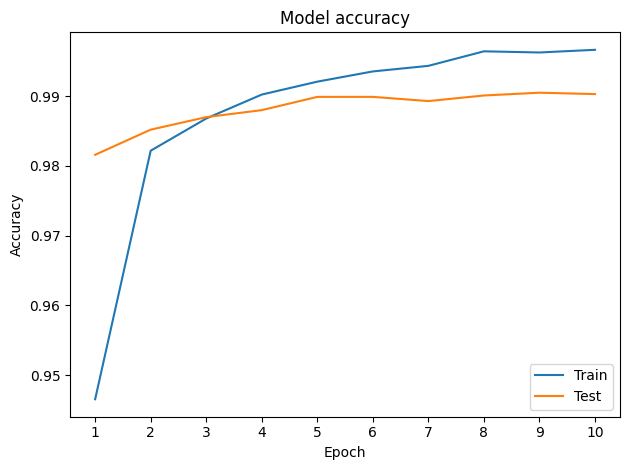

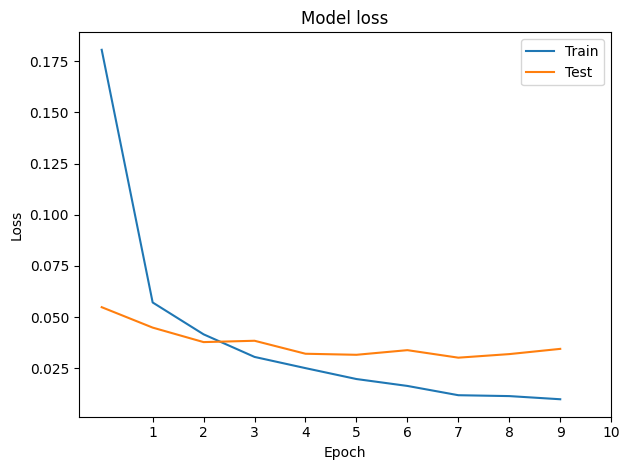

In [8]:
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend(['Train', 'Test'], loc='lower right')
# plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend(['Train', 'Test'], loc='upper right')
# plt.grid(True)
plt.tight_layout()
plt.show()

### **Step 10: Hyperparameter Tuning**

Now that we have the basic CNN, we can experiment with hyperparameter tuning. Here are some common hyperparameters you may want to adjust:

1. **Filter Size**: The size of the convolutional kernel (e.g., (3, 3), (5, 5)).
2. **Number of Filters**: The number of filters (also known as kernels) used in each convolutional layer.
3. **Number of Layers**: The number of convolutional layers and fully connected layers.
4. **Activation Functions**: Common activation functions include ReLU, Sigmoid, Softmax, etc.
5. **Learning Rate**: The learning rate of the optimizer.

For example, you can change the filter size or the number of layers like this:

In [ ]:
# Modify the model with different hyperparameters (e.g., more filters, different kernel sizes)
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### **Step 11: Common Pitfalls and Troubleshooting Tips**

1. **Overfitting**: If the model performs well on the training data but poorly on the test data, the model might be overfitting. You can prevent this by using:
  - **Dropout**: Add dropout layers between the dense layers.
  - **Early Stopping**: Stop training when the validation loss stops improving.
  - **Data Augmentation**: Augment the data with transformations like rotation, flipping, etc.


In [ ]:
# Example: Adding a dropout layer
model.add(layers.Dropout(0.5))

2. **Vanishing/Exploding Gradients**: If the gradients become too small or too large during training, the network may fail to converge. You can use the ReLU activation function (as shown above) to mitigate this issue.

3. **Learning Rate Issues**: If the model isn’t learning, try lowering the learning rate. If it’s learning too slowly, try increasing it.

In [ ]:
# Example: Using a different learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

4. **Incorrect Image Shape**: Ensure that the image data is reshaped properly before feeding it into the model. For example, if the images are grayscale, they should be reshaped into `(height, width, 1)`.

### **Conclusion**

This guide provides a simple, step-by-step implementation of a CNN using **TensorFlow/Keras**. It covers everything from model building to training, evaluation, and common pitfalls in CNN training. You can experiment with hyperparameter tuning, architecture modifications, and various strategies to improve model performance.